<h1> Lecture 28

Data Science 8, Spring 2021 </h1>

<h3>
<b>
<ul>
<li>Residuals</li>
</ul>
</b>
</h3>

In [145]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

## Review: Numerical Optimization ##

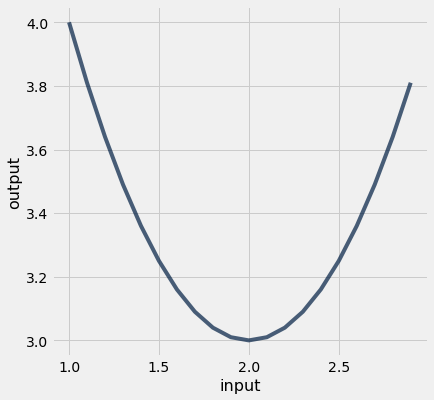

In [146]:
inputs = np.arange(1, 3, 0.1)
outputs = (inputs-2)**2 + 3
Table().with_columns('input', inputs, 'output', outputs).plot('input')

In [147]:
def f(inputs):
    return ((inputs-2)**2) + 3

In [148]:
minimize(f)

1.9999999946252267

### Minimizing RMSE ###

In [149]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [150]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [151]:
demographics_rmse(1500, 20000)

11559.086490075999

In [152]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [153]:
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

## Residuals

In [154]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation coefficient: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [155]:
def residuals(t, x, y):
    actual_vals = t.column(y)
    predictions = fitted_values(t, x, y)
    return actual_vals - predictions

In [156]:
demographics

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3
61413,36.7
34664,19.4
76440,29.6
50537,24.5
49072,34


In [157]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


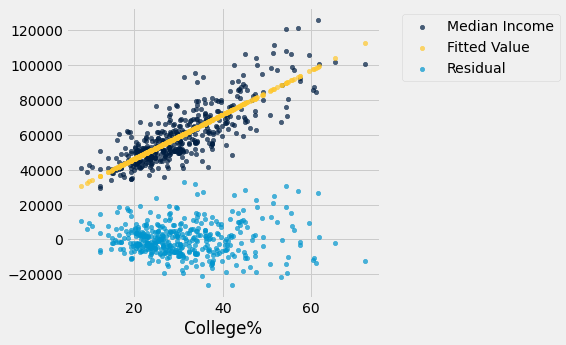

In [158]:
demographics.scatter('College%')

In [159]:
# any pattern ?

In [160]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

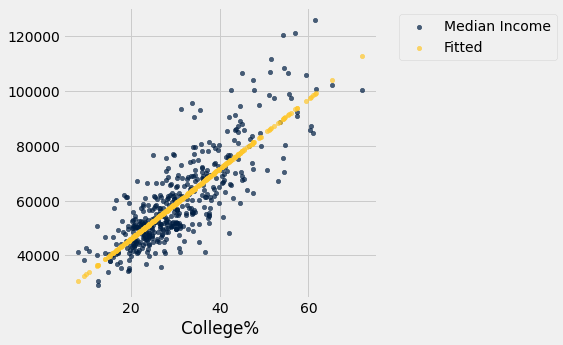

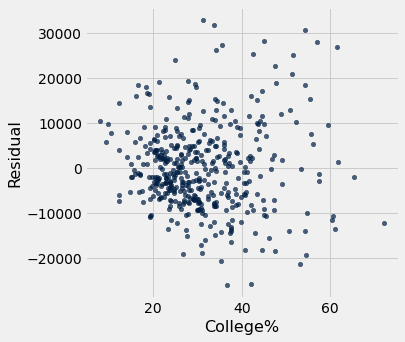

In [161]:
plot_residuals(demographics, 'College%', 'Median Income')

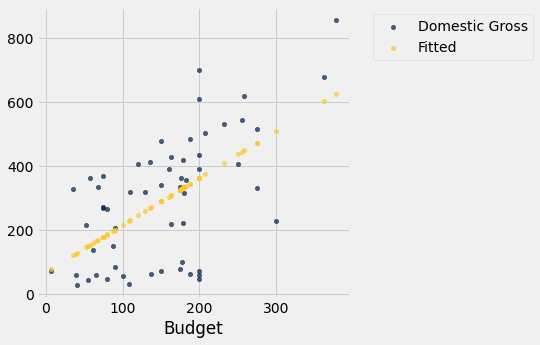

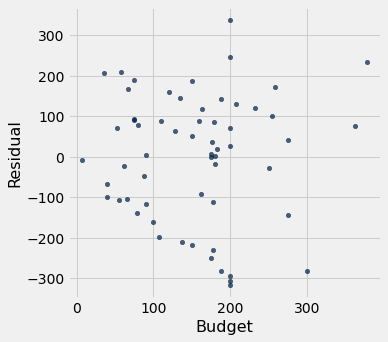

In [162]:
movies = Table.read_table('movies.csv')
cash = movies.select("Budget", "Domestic Gross")
plot_residuals(cash, 'Budget', 'Domestic Gross')

SLIDE: Regression Diagnostics

## Dugongs ##

In [163]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


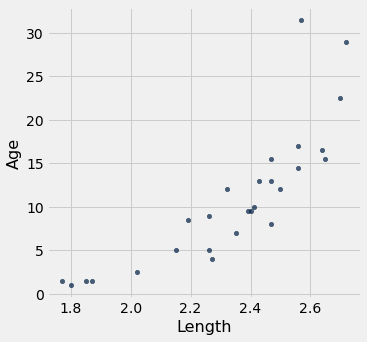

In [164]:
dugong.scatter('Length', 'Age')

Let's use the length of the dugong and see if we can predict how old it is.

In [165]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

That's a high correlation coefficient.

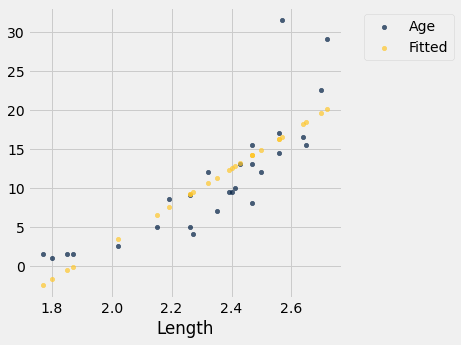

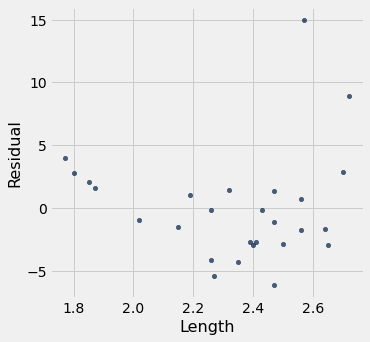

In [166]:
plot_residuals(dugong, 'Length', 'Age')

Does the residuals scatter plot support a linear association between length and age?

<h3>US Women</h3>

In [167]:
us_women = Table.read_table('us_women.csv')
us_women.show()

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [168]:
us_women.num_rows

15

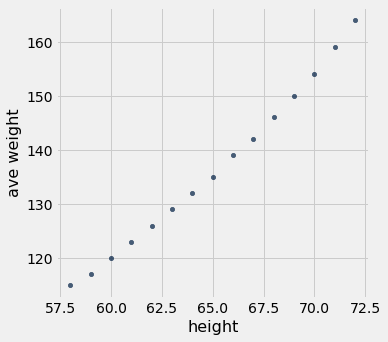

In [169]:
us_women.scatter('height')

In [170]:
correlation(us_women, 'height', 'ave weight')

0.9954947677842161

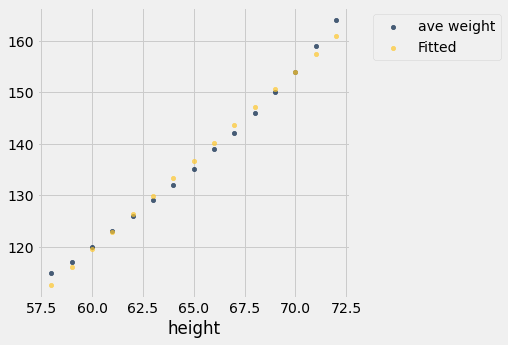

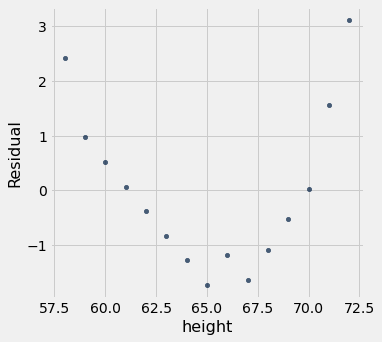

In [171]:
plot_residuals(us_women, 'height', 'ave weight')

SLIDE: Residual Plot slide after dugongs

<h3>Properties of Residuals</h3>

<h4>Average of Residuals</h4>

In [172]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [173]:
round(np.average(residuals(cash, 'Budget', 'Domestic Gross')), 6)

-0.0

In [174]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

<h4><u>Note</u>: Whether or not a linear association governs the data set, the sum of the residuals (errors) for the best-fit line (or curve) is zero&mdash;always!</h4>

In [175]:
round(np.average(residuals(us_women, 'height', 'ave weight')))

0

<h4>Correlation of Residuals</h4>

In [176]:
cash = cash.with_columns(
    'Residual', residuals(cash, 'Budget', 'Domestic Gross'),
    'Fitted Value', fitted_values(cash, 'Budget', 'Domestic Gross')
)


In [177]:
round(correlation(cash, 'Budget', 'Domestic Gross'), 6)

0.597995

In [178]:
round(correlation(cash, 'Budget', 'Residual'), 6)

-0.0

In [179]:
round(correlation(cash, 'Fitted Value', 'Residual'), 6)

-0.0

SLIDE: Properties of Residuals

## A Measure of Clustering ##

In [180]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

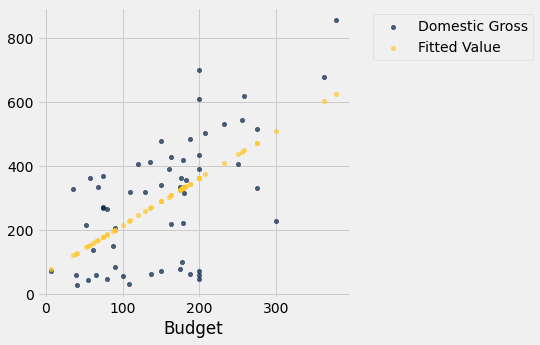

In [181]:
plot_fitted(cash, 'Budget', 'Domestic Gross')

Let's look at the vertical standard deviation of the actual Domestic Gross (𝑦
values of the scatter plot, the blue points) from the movies data set.

In [182]:
observed_sd = np.std(cash.column('Domestic Gross'))
observed_sd

194.7700431848343

The above is the standard deviation of an ignorant (blind) estimate.

Now, let's look at the vertical standard deviation of the fitted values ($y$ values of the yellow line) from the movies data set.

In [183]:
predictions_sd = np.std(fitted_values(cash, 'Budget', 'Domestic Gross'))
predictions_sd

116.47157420607061

The above is the standard deviation of an informed estimate.

### What about the standard deviation of the error if we make a prediction knowing the budget of the movies?
    
<u>Answer</u>: In that case, the standard deviation is simply the standard deviation of the errors (residuals).

So we're looked at <br>
<ul><li>the standard deviation of the actual values;</li><br>
        
<li>the standard deviation of the fitted values; and</li><br>
        
<li>the standard deviation of the residuals.</li>
</ul>
We'll now look at how they relate.

Ratio of the SD of the predictions (fitted values) and the SD of the actual values:

In [184]:
predictions_sd / observed_sd

0.5979953195140003

The correlation coefficient of the Budget (i.e., $x$) and Domestic Gross (i.e., $y$) is the same as the ratio above:

In [185]:
correlation(cash, 'Budget', 'Domestic Gross')

0.5979953195140002

Test the same thing on the dugong data set:

In [186]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))

Ratio of the SD of the predictions (fitted values) and the SD of the actual values:

In [187]:
dugong_prediction_sd / dugong_observed_sd

0.8296474554905713

The correlation coefficient of the Dugong Length (i.e., $x$) and Dugong Age (i.e., $y$) is the same as the ratio above:

In [188]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

<h3>Acceleration and MPG relationship in a data set of hybrid cars.</h3>

In [189]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


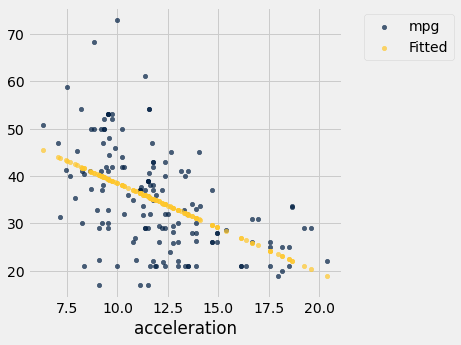

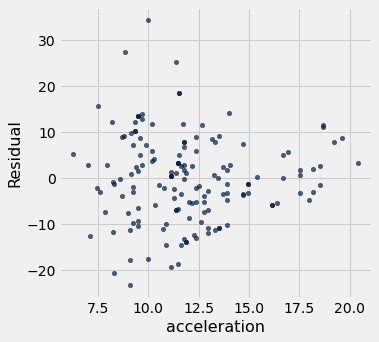

In [190]:
plot_residuals(hybrid, 'acceleration', 'mpg')

The residuals scatter plot above has a wedge shape.  It's <u>not</u> a patternless blob. It has <i>heteroskasticity&mdash;the variability changes (in this case, reduced) as we go along the horizontal axis.</i>.

The correlation coefficient between Acceleration and MPG is negative, as expected.

In [191]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

Ratio of the SD of the predictions (fitted values) and the SD of the actual values:

In [192]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

In this case, the correlation coefficient is the <i>negative</i> of the ratio of the two SDs.  Note that the ratio of the SDs can never be negative, because SD is never negative.

No matter what the shape of the scatter plot, the SD of the predictions (fitted values, $\widehat{y}$) is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

SLIDE: SD of Fitted Values

<h3> SD of the Residuals </h3>
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

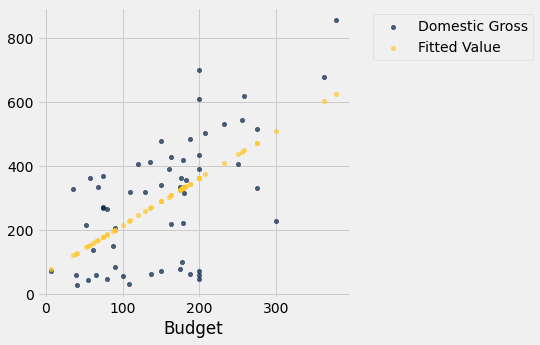

In [193]:
plot_fitted(cash, 'Budget', 'Domestic Gross')

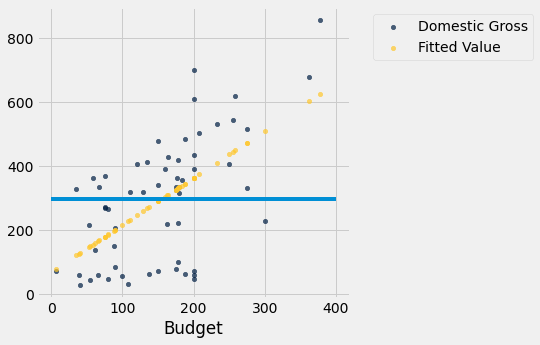

In [194]:
plot_fitted(cash, 'Budget', 'Domestic Gross')
ave_movie = np.mean(cash.column('Domestic Gross'))
plots.plot([0, 400], [ave_movie, ave_movie]);

### A Variance Decomposition

Variance of the Domestic Gross (based on blind estimation w/o knowing movie Budgets)

In [195]:
np.std(cash.column('Domestic Gross')) ** 2

37935.36972222222

Variance of the Residuals:

In [196]:
np.std(residuals(cash, 'Budget', 'Domestic Gross')) ** 2

24369.74212418201

Variance of the Fitted Values (Predictions):

In [197]:
np.std(cash.column('Fitted Value')) ** 2

13565.627598040213

Note that:<br><br> Variance of the Residuals + Variance of Fitted Values = Variance of the Observed Domestic Gross values:

In [198]:
np.std(residuals(cash, 'Budget', 'Domestic Gross')) ** 2 + np.std(cash.column('Fitted Value')) ** 2

37935.369722222225

<h3>Dugongs</h3>

In [199]:
np.std(dugong.column('Age')) ** 2

59.635802469135804

In [200]:
np.std(fitted_values(dugong, 'Length', 'Age')) ** 2

41.04821143693533

In [201]:
np.std(residuals(dugong, 'Length', 'Age')) ** 2

18.58759103220045

Correlation Coefficient of Movies

In [202]:
r = correlation(cash, 'Budget', 'Domestic Gross')
r

0.5979953195140002

In [203]:
np.sqrt(1 - r**2) * np.std(cash.column('Domestic Gross'))

156.1081103728503

Compare with the SD of the Residuals:

In [204]:
np.std(residuals(cash, 'Budget', 'Domestic Gross'))

156.1081103728503

Now try on the Hybrid Car Data:

In [205]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [206]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

9.43273683343029

Compare with the SD of the Residuals:

In [207]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.43273683343029

Slides: Discussion Questions